In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from fastai2.vision.all import show_image, show_images
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from pathlib import Path
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader

from htools import *
from img_wang.data import get_databunch
from img_wang.models import SingleInputBinaryModel, TorchvisionEncoder,\
    load_encoder
from img_wang.torch_utils import gpu_setup, PredictionExaminer
from incendio.core import Trainer

/opt/conda/envs/fastai/lib/python3.7/site-packages/incendio/callbacks.py:25: UserWarning: Accio not available.
  warnings.warn('Accio not available.')


In [3]:
cd_root()
gpu_setup()

Current directory: /storage/img-wang
Setting seeds for reproducible training.


In [4]:
dst, dsv, dlt, dlv = get_databunch('data/imagewang-160/', 
                                   mode='supervised',
                                   bs=128)

In [5]:
net = SingleInputBinaryModel(
    TorchvisionEncoder('mobilenet_v2', pretrained=False),
    n_out=len(dst.class_to_idx)
)

In [6]:
T = Trainer(net, dst, dsv, dlt, dlv, F.cross_entropy, 'multiclass', 
            'data/supervised_models/v10', last_act=nn.Softmax(-1))

## v5

Pretrained MobileNet (no SSL).

In [7]:
T.load(old_path='data/supervised_models/v5/trainer.pkl')

2020-10-14 05:14:16,962 [INFO]: Loading weights from data/supervised_models/v5/trainer.pkl.


In [25]:
px = PredictionExaminer(T, 'train')
dft5 = px.evaluate()
dft5.ends()

y  y_pred   y_proba                         title  correct   mistake
1598  16      13  0.998783  True: 16\nPred: 13 (p=0.999)    False  0.998783
8407  14      16  0.997315  True: 14\nPred: 16 (p=0.997)    False  0.997315
9775   6      13  0.993245   True: 6\nPred: 13 (p=0.993)    False  0.993245
1687   0       0  1.000000    True: 0\nPred: 0 (p=1.000)     True -1.000000
9044   0       0  1.000000    True: 0\nPred: 0 (p=1.000)     True -1.000000
5736   0       0  1.000000    True: 0\nPred: 0 (p=1.000)     True -1.000000

In [76]:
{lbl: dict(dft5.loc[(~dft5.correct) & (dft5.y == lbl), 'y_pred'].value_counts().head(3))
 for lbl in dft5.y.unique()}

{16: {17: 13, 13: 12, 12: 4},
 14: {13: 17, 19: 12, 16: 10},
 6: {5: 5, 7: 2, 1: 2},
 8: {1: 22, 3: 9, 5: 7},
 18: {0: 6, 15: 4, 12: 4},
 9: {1: 46, 8: 14, 10: 11},
 13: {8: 19, 15: 12, 0: 11},
 1: {5: 6, 6: 5, 8: 4},
 0: {8: 5, 10: 4, 18: 3},
 11: {8: 10, 5: 6, 3: 5},
 17: {13: 24, 12: 24, 16: 11},
 15: {13: 11, 8: 9, 0: 8},
 4: {3: 33, 8: 6, 11: 2},
 5: {6: 6, 1: 2, 15: 1},
 7: {11: 13, 5: 13, 1: 10},
 2: {11: 7, 5: 7, 3: 5},
 19: {13: 7, 17: 4, 15: 4},
 12: {16: 10, 17: 8, 8: 5},
 3: {8: 7, 1: 4, 5: 3},
 10: {14: 2, 8: 2, 18: 2}}

In [80]:
px.confusion_matrix()

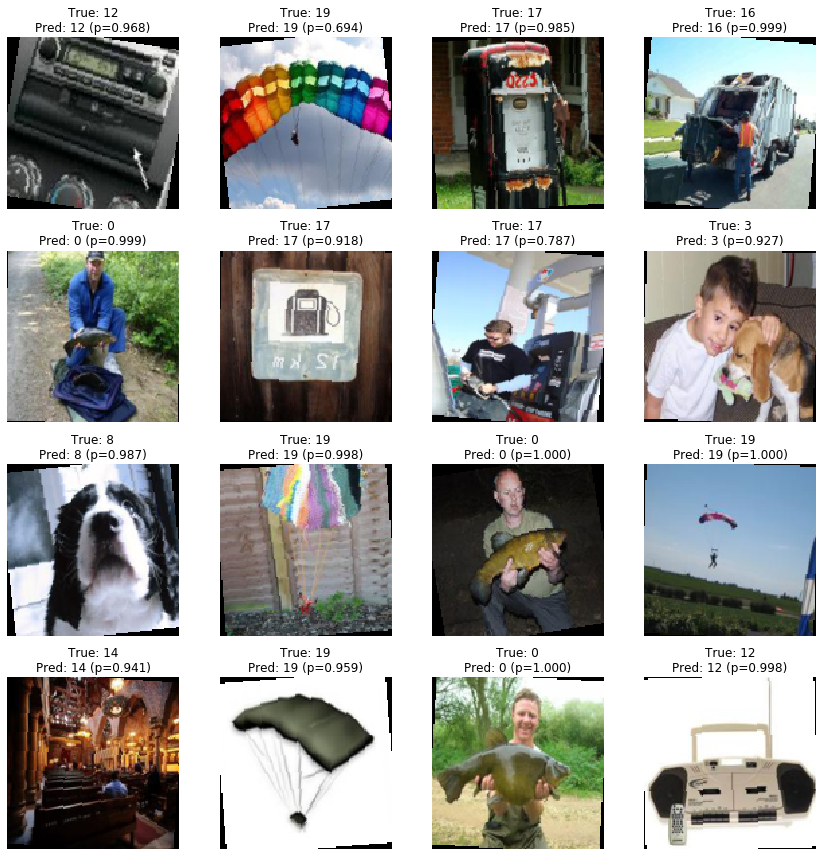

In [26]:
px.random()

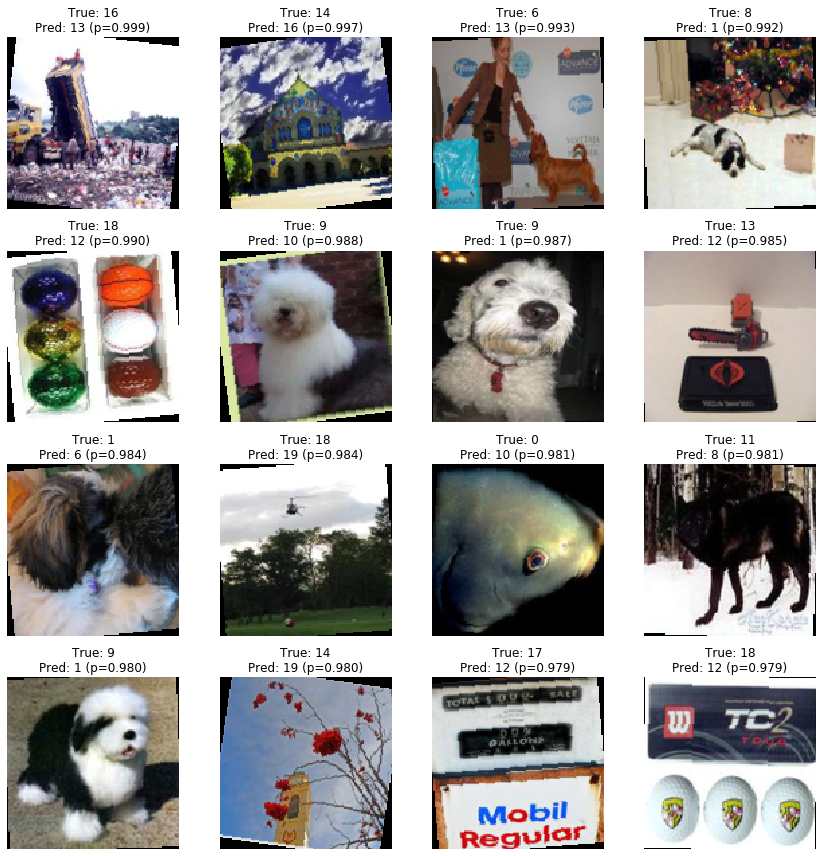

In [27]:
px.most_wrong()

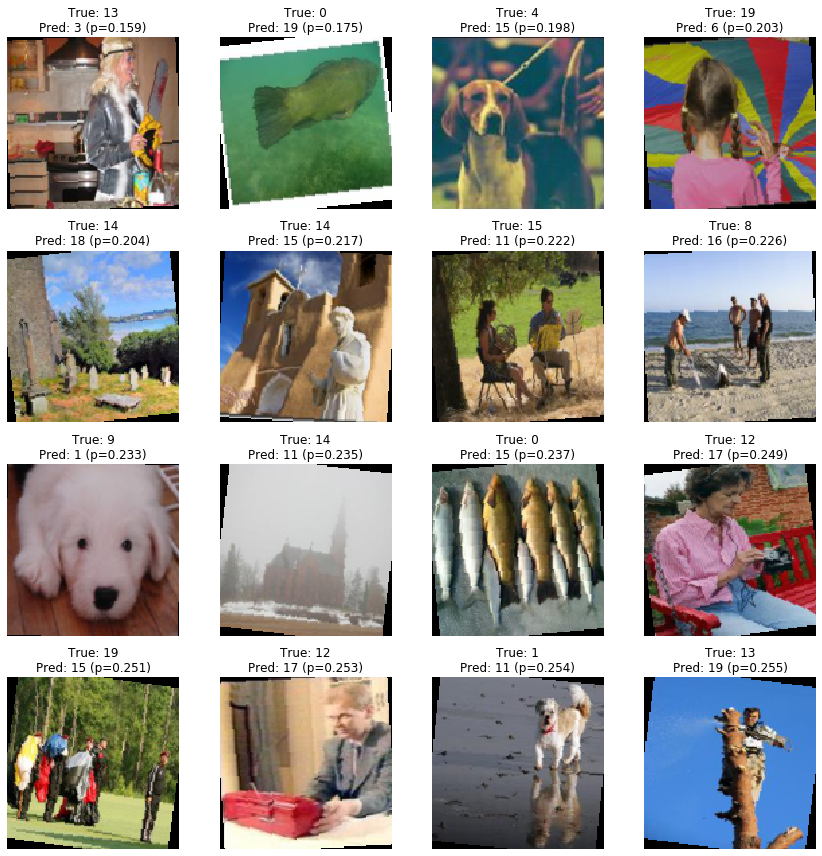

In [81]:
px.least_wrong()

In [92]:
px = PredictionExaminer(T, 'val')
dfv5 = px.evaluate()
dfv5.ends()

y  y_pred   y_proba                        title  correct   mistake
134    4       8  0.999489   True: 4\nPred: 8 (p=0.999)    False  0.999489
1485  10       8  0.999409  True: 10\nPred: 8 (p=0.999)    False  0.999409
2415  11       8  0.999400  True: 11\nPred: 8 (p=0.999)    False  0.999400
2335   6       6  0.999980   True: 6\nPred: 6 (p=1.000)     True -0.999980
1693   6       6  0.999981   True: 6\nPred: 6 (p=1.000)     True -0.999981
2500   6       6  0.999993   True: 6\nPred: 6 (p=1.000)     True -0.999993

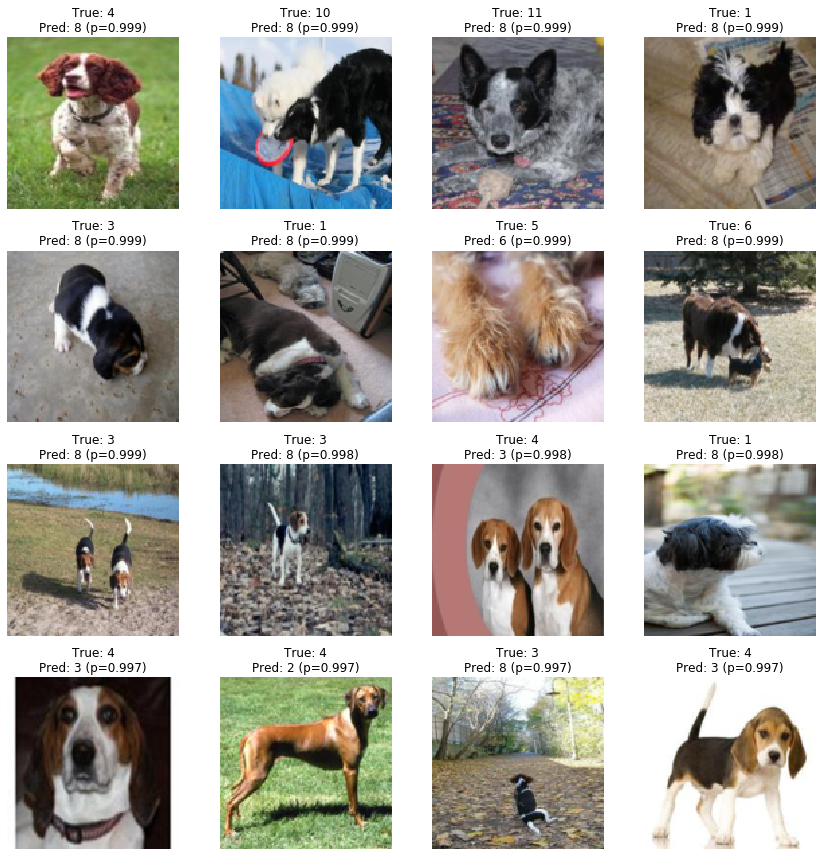

In [93]:
px.most_wrong()

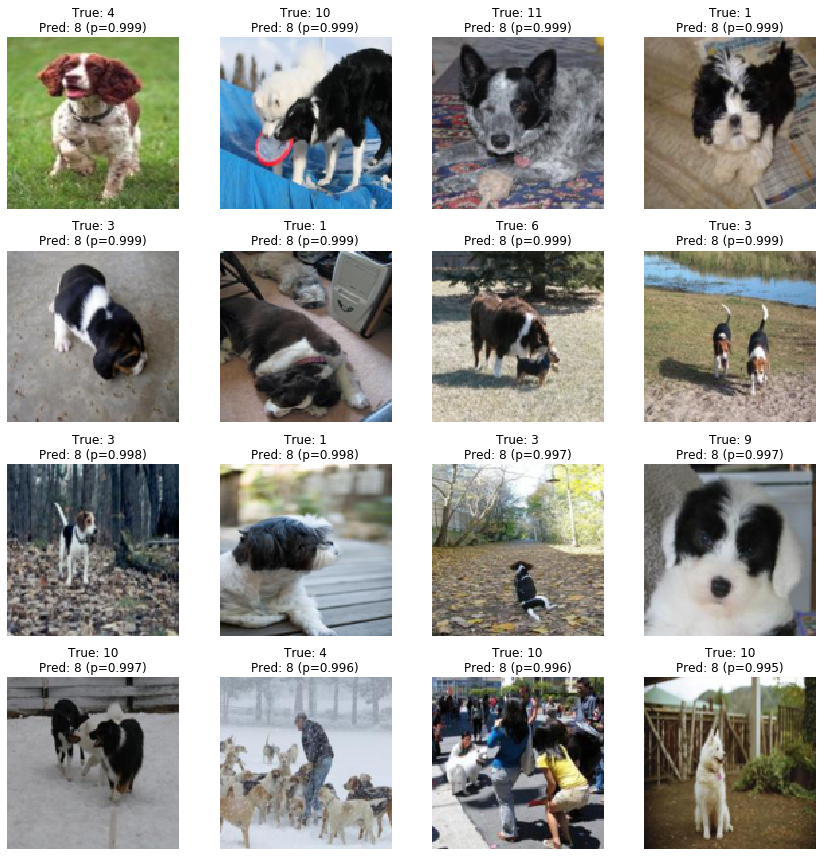

In [94]:
px.most_wrong(pred_classes=[8])

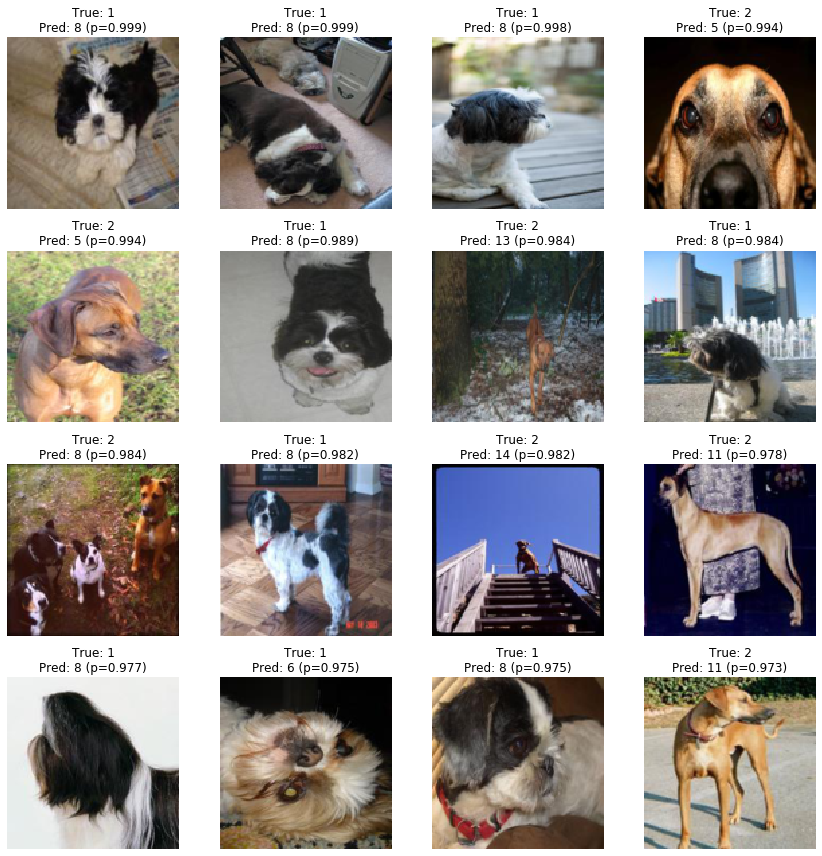

In [96]:
px.most_wrong(true_classes=[1, 2])

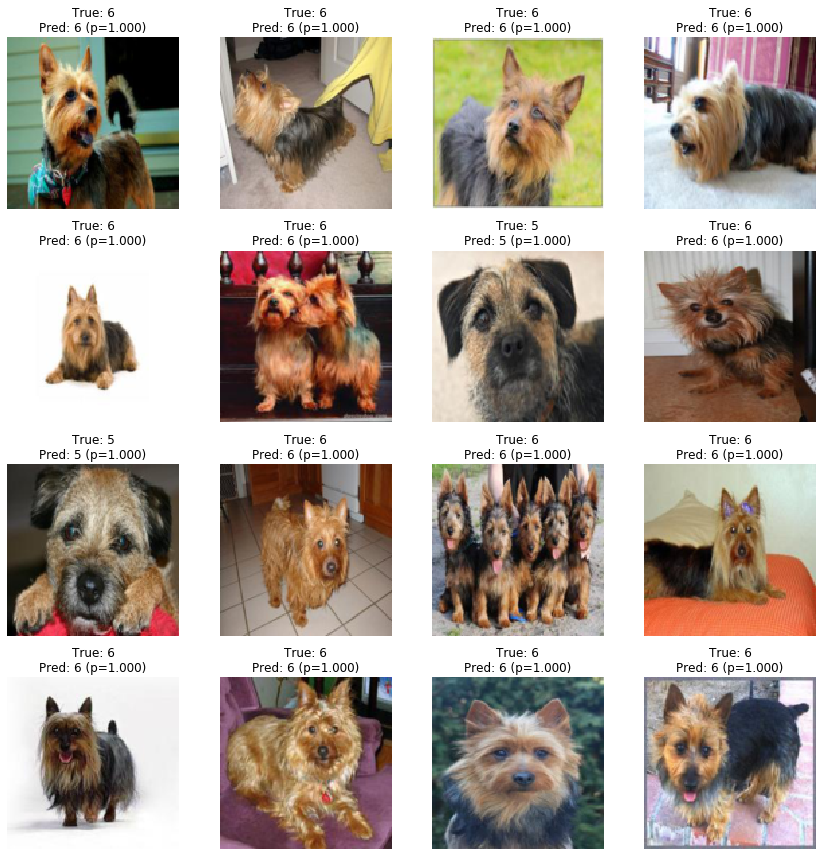

In [97]:
px.most_correct()

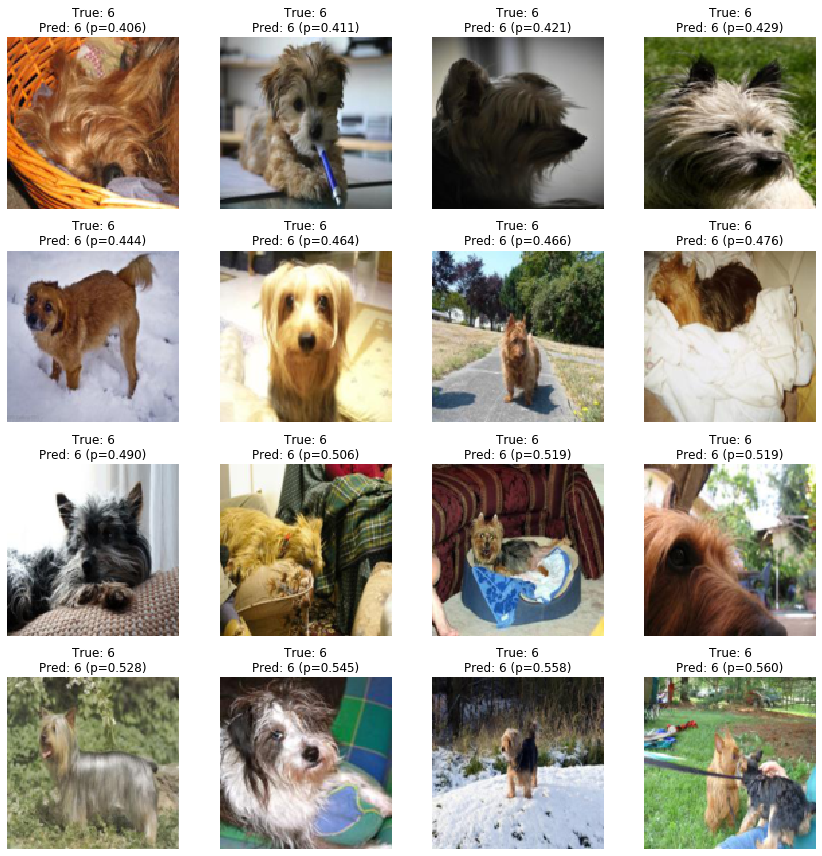

In [98]:
px.least_correct(true_classes=[6])

In [99]:
px.confusion_matrix()